In [178]:
%matplotlib inline

import cv2
import time
from copy import copy
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [327]:
img = cv2.imread('data/whole.png')

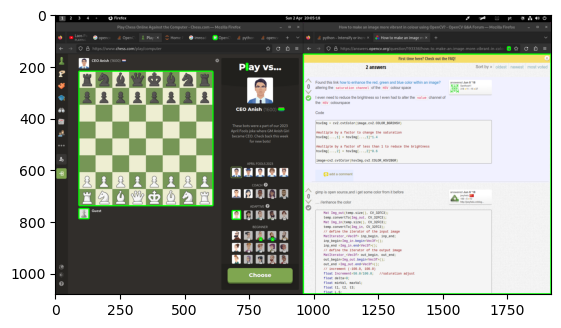

In [330]:
copy = np.copy(img)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
small_contours = []
for item in contours:
    if len(item) <= 10:
        small_contours.append(item)
    
small_contours.sort(key=cv2.contourArea, reverse=True)
for i in range(10):
    cv2.drawContours(copy, [small_contours[i]], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [236]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[...,1] = hsv[...,1]*5
saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
found, corners = cv2.findChessboardCorners(saturated, (7,7), flags=cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_NORMALIZE_IMAGE)
corner_img = copy(img)
cv2.drawChessboardCorners(corner_img, (7,7), corners, found)
found

False

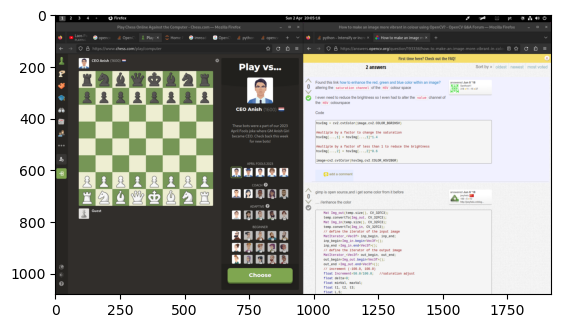

In [237]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

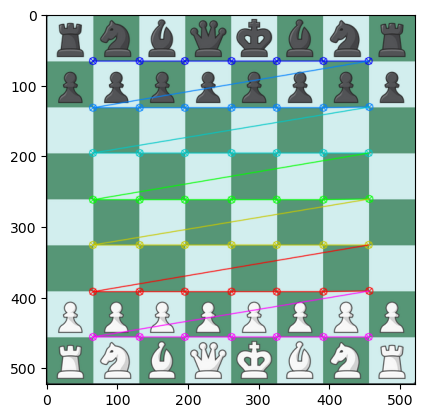

In [206]:
plt.imshow(corner_img)

In [149]:
chessboard = np.empty((8,8), dtype='object')
corner_array = np.array(corners).reshape(7, 7, 2)
corner_array = np.swapaxes(corner_array, 0, 1)

In [150]:
distances = []
for y in range(7):
    for x in range(7):
        current = corner_array[x][y]
        if y < 6:
            above = corner_array[x][y+1]
            distances.append(abs(current[1] - above[1]))
        if x < 6:
            right = corner_array[x+1][y]
            distances.append(abs(current[0] - right[0]))
distances
square_size = np.round(sum(distances)/len(distances))
square_size

100.0

In [159]:
width, height, channels = img.shape
for y in range(8):
    for x in range(8):   
        #top left corner
        tl = np.copy(corner_array[max(0, x-1)][max(0, y-1)])+1
        if x == 0: tl[0] = max(0, tl[0] - square_size)
        if y == 0: tl[1] = max(0, tl[1] - square_size)
            
        br = np.copy(corner_array[min(6, x)][min(6, y)])
        if x == 7: br[0] = min(width-1 , br[0] + square_size)
        if y == 7: br[1] = min(height-1, br[1] + square_size)
        
        chessboard[x][7 - y] = img[
            round(tl[1]):round(br[1]), 
            round(tl[0]):round(br[0])
        ]    

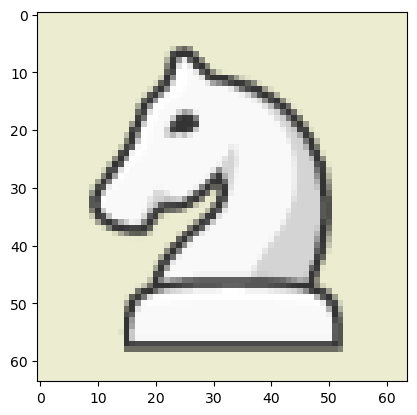

In [167]:
image = chessboard[1][0]
edge = cv2.Canny(image, 0, 255)
resized = cv2.resize(image,(64, 64), cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

In [161]:
rgb = cv2.calcHist([image], [0, 1, 2], None, [5, 5, 5], [0, 256, 0, 256, 0, 256])

In [55]:
rgb.shape

(5, 5, 5)

In [100]:
#f9f9f9
#525457
unique, colors = np.unique(
    image.reshape(-1, image.shape[-1]),
    axis=0,
    return_counts=True
)
white = np.where(np.all(unique == [249, 249, 249], axis=-1))[0]
black = np.where(np.all(unique == [82, 84, 87], axis=-1))[0]
if len(white) == 0:
    print('black')
elif len(black) == 0 or colors[white] > colors[black]:
    print('white')
else:
    print('black')

white
